# Demonstrate access to individual simulations via the Intake catalog

In [1]:
import rompy
import xarray as xr

xr.set_options(display_style='text')

In [2]:
cat = rompy.cat

In [3]:
cat.csiro.swan.walk()

{'swan_perth_fc.map': name: map
 container: xarray
 plugin: ['netcdf']
 driver: ['netcdf']
 description: SWAN Maps output
 direct_access: forbid
 user_parameters: [{'name': 'fcdate', 'description': 'Forecast date', 'type': 'datetime', 'default': Timestamp('2021-02-03 00:00:00')}]
 metadata: 
   plots: 
     hs: 
       title: Significant wave height
       kind: quadmesh
       x: longitude
       y: latitude
       z: hs
       groupby: time
       cmap: rainbow
       projection: PlateCarree
       width: 600
       height: 600
       dynamic: True
       rasterize: True
 args: 
   chunks: 
     time: 24
   urlpath: {{ CATALOG_DIR.replace("fileServer","dodsC") }}/{{fcdate.strftime("%Y%m%d.000000")}}/swan_out.nc,
 'swan_perth_fc.table': name: table
 container: xarray
 plugin: ['netcdf']
 driver: ['netcdf']
 description: SWAN Table output
 direct_access: forbid
 user_parameters: [{'name': 'fcdate', 'description': 'Forecast date', 'type': 'datetime', 'default': Timestamp('2021-02-03 00:

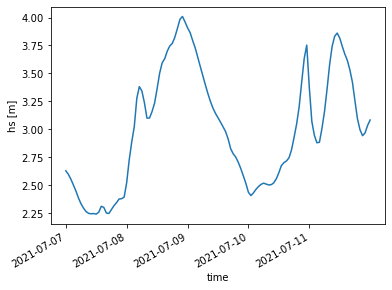

In [4]:
ds=cat.csiro.swan.swan_perth_fc.spectra(fcdate='2021-07-08').to_dask()
ds.hs.isel(points=100).plot()

In [ ]:
import geoviews as gv
gv.extension('bokeh')

In [ ]:
cat.csiro.swan.swan_perth_fc.map(fcdate='2021-07-08').hvplot.hs()

In [7]:
import wavespectra as ws

In [8]:
ds_ws = ws.read_dataset(ds)
ds_ws

<xarray.Dataset>
Dimensions:  (dir: 36, freq: 32, site: 438, time: 121)
Coordinates:
  * time     (time) datetime64[ns] 2021-07-08 2021-07-08T01:00:00 ... 2021-07-13
  * freq     (freq) float32 0.0464 0.05123 0.05657 0.06245 ... 0.8203 0.9057 1.0
  * dir      (dir) float32 265.0 255.0 245.0 235.0 ... 305.0 295.0 285.0 275.0
  * site     (site) int64 1 2 3 4 5 6 7 8 9 ... 431 432 433 434 435 436 437 438
Data variables:
    lon      (site) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    lat      (site) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    efth     (time, site, freq, dir) float32 dask.array<chunksize=(121, 1, 32, 36), meta=np.ndarray>
    dpt      (time, site) float32 dask.array<chunksize=(121, 1), meta=np.ndarray>
    wspd     (time, site) float32 dask.array<chunksize=(121, 1), meta=np.ndarray>
    wdir     (time, site) float32 dask.array<chunksize=(121, 1), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.5
    History:                         Created with agioncmd version 1.5
    Directional_convention:          nautical
    project:                         SWAN
    model:                           41.31
    run:                             
    DODS_EXTRA.Unlimited_Dimension:  time

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


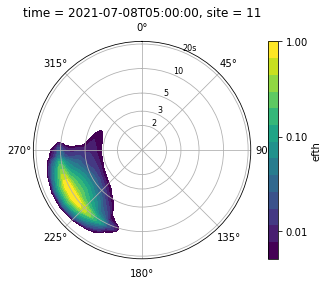

In [9]:
ds_ws.isel(site=10,time=5).spec.plot(as_period=True,cmap='viridis')